In [1]:
%matplotlib inline
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/home/nao/.pyenv/versions/3.6.9/envs/py36_tf2/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
file_paths = glob.glob("./data/*")
print(file_paths)

['./data/20200323b_not_seating.csv', './data/20200323a_seating.csv', './data/20200322a_not_seating.csv', './data/20200324d_not_seating.csv', './data/20200319_seating.csv', './data/20200325e_not_seating.csv', './data/20200326b_not_seating.csv', './data/20200319_not_seating.csv', './data/20200325c_seating.csv', './data/20200326a_seating.csv', './data/20200324f_seating.csv', './data/20200323c_not_seating.csv', './data/20200324a_seating.csv', './data/20200324c_not_seating.csv', './data/20200325a_seating.csv', './data/20200324b_seating.csv', './data/20200325b_seating.csv']


In [4]:
category =np.empty((0,1), float)
rssi =np.empty((0,100), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    category_tmp, rssi_tmp = np.hsplit(d, [1])
    rssi = np.concatenate([rssi, rssi_tmp], axis=0)
    category = np.concatenate([category, category_tmp], axis=0)

rssi = rssi * (-1) / 128
print("rssi array shape : ", rssi.shape)
#print(rssi)
category = tf.keras.utils.to_categorical(category, 2)
print("category array shape : ", category.shape)
#print(category)

rssi_train, rssi_test, category_train, category_test = train_test_split(rssi, category, test_size=0.3)
print("rssi training array shape : ", rssi_train.shape)
#print(rssi_train)
print("category training array shape : ", category_train.shape)
#print(category_train)
print("rssi test array shape : ", rssi_test.shape)
print("category test array shape : ", category_test.shape)

#train_data = tf.data.Dataset.from_tensor_slices((rssi_train, category_train))
#print(train_data)

rssi array shape :  (7297, 100)
category array shape :  (7297, 2)
rssi training array shape :  (5107, 100)
category training array shape :  (5107, 2)
rssi test array shape :  (2190, 100)
category test array shape :  (2190, 2)


In [5]:
# モデルを作成
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(100, ), activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(2, activation='softmax'))

# サマリーを出力
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 87,234
Trainable params: 87,234
Non-trainable params: 0
_________________________________________________________________


Train on 5107 samples, validate on 2190 samples
Epoch 1/256
5107/5107 [==============================] - 1s 271us/sample - loss: 0.6737 - accuracy: 0.6066 - val_loss: 0.6632 - val_accuracy: 0.6365
Epoch 2/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.6707 - accuracy: 0.6129 - val_loss: 0.6598 - val_accuracy: 0.6365
Epoch 3/256
5107/5107 [==============================] - 0s 47us/sample - loss: 0.6709 - accuracy: 0.6129 - val_loss: 0.6616 - val_accuracy: 0.6365
Epoch 4/256
5107/5107 [==============================] - 0s 52us/sample - loss: 0.6692 - accuracy: 0.6129 - val_loss: 0.6598 - val_accuracy: 0.6365
Epoch 5/256
5107/5107 [==============================] - 0s 52us/sample - loss: 0.6702 - accuracy: 0.6129 - val_loss: 0.6572 - val_accuracy: 0.6365
Epoch 6/256
5107/5107 [==============================] - 0s 50us/sample - loss: 0.6692 - accuracy: 0.6129 - val_loss: 0.6569 - val_accuracy: 0.6365
Epoch 7/256
5107/5107 [==============================] - 0s 46u

Epoch 56/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5770 - accuracy: 0.7218 - val_loss: 0.5515 - val_accuracy: 0.7475
Epoch 57/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5744 - accuracy: 0.7268 - val_loss: 0.5747 - val_accuracy: 0.7269
Epoch 58/256
5107/5107 [==============================] - 0s 45us/sample - loss: 0.5724 - accuracy: 0.7280 - val_loss: 0.5493 - val_accuracy: 0.7479
Epoch 59/256
5107/5107 [==============================] - 0s 42us/sample - loss: 0.5810 - accuracy: 0.7216 - val_loss: 0.5541 - val_accuracy: 0.7457
Epoch 60/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5804 - accuracy: 0.7204 - val_loss: 0.5590 - val_accuracy: 0.7420
Epoch 61/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5799 - accuracy: 0.7192 - val_loss: 0.5523 - val_accuracy: 0.7489
Epoch 62/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5742 - accuracy: 0.7274

Epoch 111/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.6033 - accuracy: 0.7243 - val_loss: 0.5885 - val_accuracy: 0.7384
Epoch 112/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5967 - accuracy: 0.7274 - val_loss: 0.5828 - val_accuracy: 0.7438
Epoch 113/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5990 - accuracy: 0.7163 - val_loss: 0.5762 - val_accuracy: 0.7438
Epoch 114/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5910 - accuracy: 0.7331 - val_loss: 0.5890 - val_accuracy: 0.7037
Epoch 115/256
5107/5107 [==============================] - 0s 45us/sample - loss: 0.5953 - accuracy: 0.7171 - val_loss: 0.5834 - val_accuracy: 0.7311
Epoch 116/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5919 - accuracy: 0.7225 - val_loss: 0.5847 - val_accuracy: 0.7119
Epoch 117/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5910 - accuracy:

5107/5107 [==============================] - 0s 46us/sample - loss: 0.5582 - accuracy: 0.7355 - val_loss: 0.5445 - val_accuracy: 0.7502
Epoch 166/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5795 - accuracy: 0.7174 - val_loss: 0.5565 - val_accuracy: 0.7429
Epoch 167/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5660 - accuracy: 0.7272 - val_loss: 0.5664 - val_accuracy: 0.7324
Epoch 168/256
5107/5107 [==============================] - 0s 45us/sample - loss: 0.5642 - accuracy: 0.7294 - val_loss: 0.5752 - val_accuracy: 0.7292
Epoch 169/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5756 - accuracy: 0.7200 - val_loss: 0.5446 - val_accuracy: 0.7507
Epoch 170/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5561 - accuracy: 0.7362 - val_loss: 0.5422 - val_accuracy: 0.7521
Epoch 171/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5572 - accuracy: 0.7362 - val_

Epoch 220/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5644 - accuracy: 0.7294 - val_loss: 0.5461 - val_accuracy: 0.7493
Epoch 221/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5730 - accuracy: 0.7237 - val_loss: 0.5419 - val_accuracy: 0.7493
Epoch 222/256
5107/5107 [==============================] - 0s 45us/sample - loss: 0.5711 - accuracy: 0.7221 - val_loss: 0.5811 - val_accuracy: 0.7215
Epoch 223/256
5107/5107 [==============================] - 0s 44us/sample - loss: 0.5619 - accuracy: 0.7304 - val_loss: 0.5649 - val_accuracy: 0.7379
Epoch 224/256
5107/5107 [==============================] - 0s 41us/sample - loss: 0.5558 - accuracy: 0.7355 - val_loss: 0.5491 - val_accuracy: 0.7489
Epoch 225/256
5107/5107 [==============================] - 0s 45us/sample - loss: 0.5606 - accuracy: 0.7298 - val_loss: 0.5443 - val_accuracy: 0.7498
Epoch 226/256
5107/5107 [==============================] - 0s 43us/sample - loss: 0.5635 - accuracy:

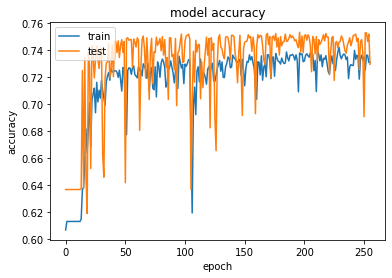

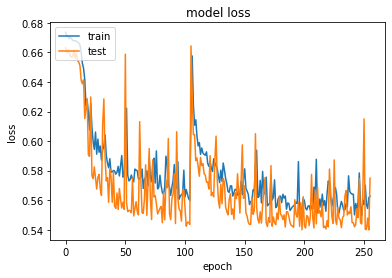

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(rssi_train, category_train,
                    batch_size=128,
                    epochs=256,
                    #verbose=1,
                    validation_data=(rssi_test, category_test))

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
model.save('model/seating_detection_algorithm.h5', save_format='h5')

In [8]:
import tensorflow as tf
from tensorflow.keras import models
import numpy as np

model = models.load_model('model/seating_detection_algorithm.h5')

x = np.loadtxt("./data/20200319_seating.csv", delimiter=',')
#print("x array shape : ", x.shape)
#print(x)

x = x[0]
#print("x array shape : ", x.shape)
#print(x)
x = np.delete(x, 0)
#print("x array shape : ", x.shape)
#print(x)
x = x.reshape(1,100)
#print("x array shape : ", x.shape)
#print(x)
x = x * (-1) / 128
#print("x array shape : ", x.shape)
#print(x)

print(np.argmax(model.predict(x)))
#l = model.predict(x)

OSError: .\data\20200319_seating.csv not found.